# Escopo do projeto

* ### 1-Importação dos pacotes
* ### 2-Funções
* ### 3-Limpeza dos dados brutos
* ### 4-Leitura dos dados limpos
* ### 5-Análise exploratória dos dados
* ### 6-Modelo do Prophet
* ### 7-Conclusões

# 1-Importação dos pacotes

In [2]:
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
from plot import plot_time_series, million_formatter,thousand_formatter, percent_formatter
from model import Modelo_prophet_semanal
import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING)
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Setando parâmetros do matplotlib
mlt.rcParams['font.size'] = 18
mlt.rcParams['figure.figsize'] = (16,8)

# 2-Funções

In [3]:
help(Modelo_prophet_semanal)

Help on class Modelo_prophet_semanal in module model:

class Modelo_prophet_semanal(builtins.object)
 |  Modelo_prophet_semanal(dados: pandas.core.frame.DataFrame, teste_periodo: int = 0, pais: str = 'BR', **kwargs_model)
 |  
 |  Parâmetros Construtor:
 |  ---------------------
 |  dados : DataFrame com duas colunas de nome 'ds'(tipo datetime) e 'y'(tipo int ou float)
 |  teste_periodo : número inteiro representando o número de dias destinado para o teste
 |  **Kwargs_model : argumentos adicionais passados para a classe fbprophet.Prophet na hora de criar o modelo
 |  
 |  Atributos
 |  ---------
 |  treino : dataset destinado aos dados de treino
 |  teste : dataset destinado aos dados de teste
 |  modelo : modelo do tipo fbprophet.Prophet
 |  previsao : previsao do modelo sobre dados de treino e teste
 |  cross : 
 |  
 |  Funções
 |  -------
 |  __init__() : construtor da classe que define os dados de treino, teste e o modelo como atributos do objeto
 |  treina() : função que utiliza

In [4]:
help(plot_time_series)

Help on function plot_time_series in module plot:

plot_time_series(df: pandas.core.frame.DataFrame, title: str = '', subtitle: str = '', xlabel: str = '', ylabel: str = '', show: bool = False, ax=None, month_freq: int = 2, formatter_x=None, formatter_y=None, fonte: str = 'https://brasil.io/dataset/covid19/caso_full/', spines_invisible: list = ['top', 'right'], ylim: list = None, xlim: list = None, kwargs_grid: dict = {'axis': 'y', 'alpha': 0.6}, **kwargs_lineplot)
    Função que plota uma série temporal com os dados relacionados ao tempo no eixo x e os dados numéricos no eixo y
    
    Parâmetros:
    ----------
    df : DataFrame do pandas a serem passados os gráfico, precisa ter 2 colunas, uma com dados do tipo datetime e outra com dados numéricos, tipo : pandas.DataFrame, argumento obrigatótio
    title : título do gráfico, tipo : str, padrão : ''
    subtitle : subtítulo do gráfico, tipo : str, padrão : ''
    xlabel : rótulo do eixo x, tipo : str, padrão : ''
    ylabel : rótulo

In [5]:
help(million_formatter)

Help on function million_formatter in module plot:

million_formatter(x, pos)
    Função responsável por formatar um eixo do 'matplotlib' dividindo os valores por Milhão, 
    mostrando duas casas decimais depois da vírgula e colocando a palavra 'Mi' após os valores indicando a grandeza,
    precisa ser passada como parâmetro para a função FuncFormatter do matplotlib.ticker



In [6]:
help(thousand_formatter)

Help on function thousand_formatter in module plot:

thousand_formatter(x, pos)
    Função responsável por formatar um eixo do 'matplotlib' dividindo os valores por Mil, 
    mostrando duas casas decimais depois da vírgula e colocando a palavra 'Mil' após os valores indicando a grandeza,
    precisa ser passada como parâmetro para a função FuncFormatter do matplotlib.ticker



In [7]:
million_formatter = FuncFormatter(million_formatter)
thousand_formatter = FuncFormatter(thousand_formatter)
percent_formatter = FuncFormatter(percent_formatter)

# 4-Leitura dos dados limpos

In [4]:
dados_br = pd.read_csv('../dados_limpos/dados_br', parse_dates=['date'])
dados_rj = pd.read_csv('../dados_limpos/dados_rj', parse_dates=['date'])

In [5]:
dados_manaus = pd.read_csv('../dados_limpos/dados_manaus', parse_dates=['date'])

# 5-Análise exploratória dos dados

In [6]:
dados_manaus.head()

,date,casos_novos,obitos_novos,MM7_casos,MM7_obitos,mes
0,2020-03-13,2,0,NaN,NaN,03-2020
1,2020-03-14,0,0,NaN,NaN,03-2020
2,2020-03-15,0,0,NaN,NaN,03-2020
3,2020-03-16,0,0,NaN,NaN,03-2020
4,2020-03-17,0,0,NaN,NaN,03-2020


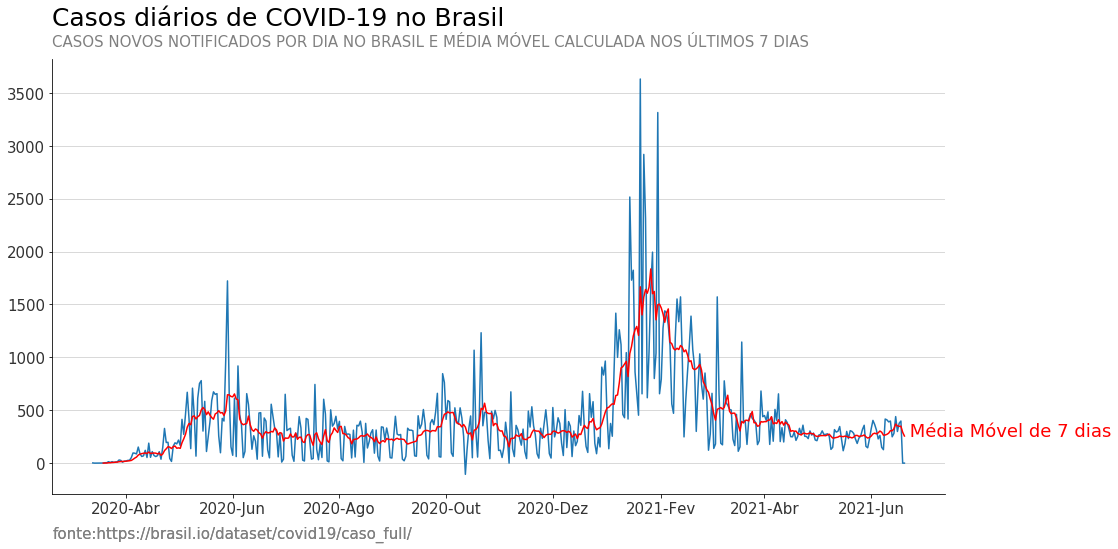

In [7]:
ax_casos=plot_time_series(dados_manaus[['casos_novos', 'date']])
plot_time_series(dados_manaus[['MM7_casos', 'date']],'Casos diários de COVID-19 no Brasil', 
                 'CASOS NOVOS NOTIFICADOS POR DIA NO BRASIL E MÉDIA MÓVEL CALCULADA NOS ÚLTIMOS 7 DIAS', color='red', ax=ax_casos)
plt.annotate(' Média Móvel de 7 dias', (dados_manaus['date'].iloc[-1],dados_manaus['MM7_casos'].iloc[-1]), color='red')
plt.show()

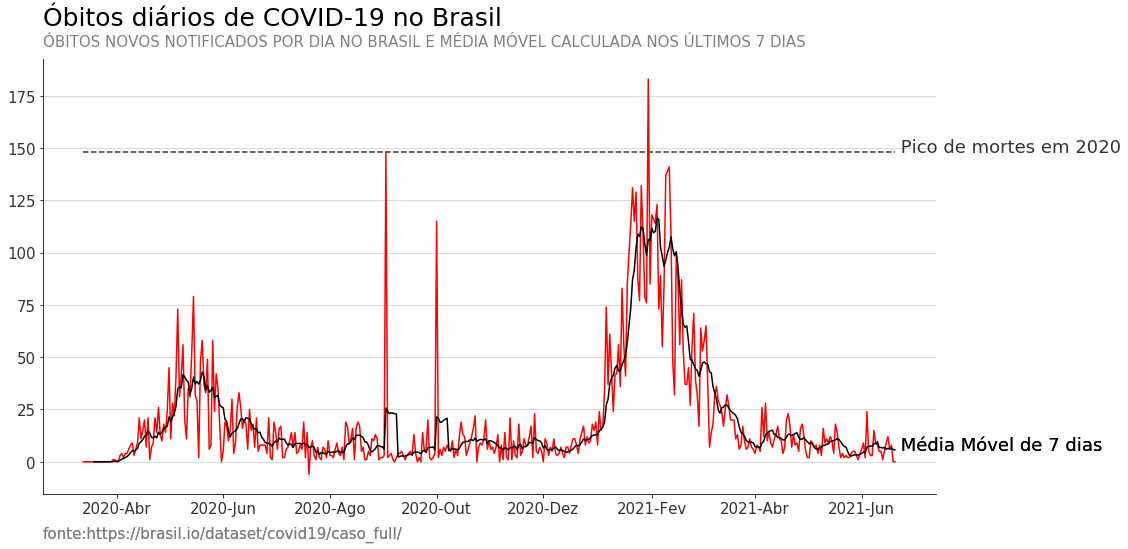

In [8]:
ax_obitos=plot_time_series(dados_manaus[['obitos_novos', 'date']], color='red')
plot_time_series(dados_manaus[['MM7_obitos', 'date']],'Óbitos diários de COVID-19 no Brasil', 
                 'ÓBITOS NOVOS NOTIFICADOS POR DIA NO BRASIL E MÉDIA MÓVEL CALCULADA NOS ÚLTIMOS 7 DIAS', color='black', ax=ax_obitos)
plt.hlines(max(dados_manaus[dados_manaus['date'].dt.year == 2020]['obitos_novos']), min(dados_manaus['date']), max(dados_manaus['date']), linestyle='--', alpha=0.8)
plt.annotate(' Pico de mortes em 2020', (dados_manaus['date'].iloc[-1],max(dados_manaus[dados_manaus['date'].dt.year == 2020]['obitos_novos'])), color='black', alpha=0.8)
plt.annotate(' Média Móvel de 7 dias', (dados_manaus['date'].iloc[-1],dados_manaus['MM7_obitos'].iloc[-1]), color='black')
plt.annotate(' Média Móvel de 7 dias', (dados_manaus['date'].iloc[-1],dados_manaus['MM7_obitos'].iloc[-1]), color='black')
plt.show()

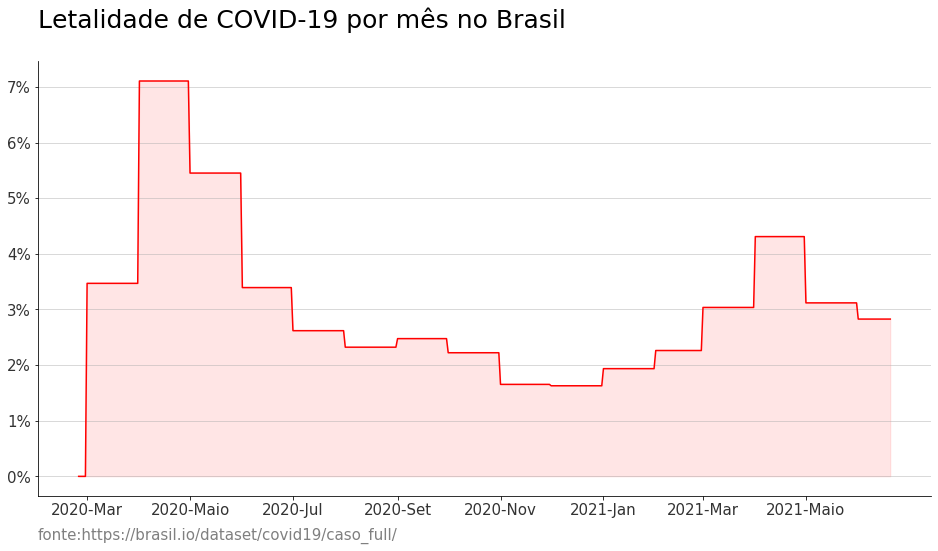

In [12]:
plot_time_series(dados_br[['letalidade_mes', 'date']],'Letalidade de COVID-19 por mês no Brasil', formatter_y=percent_formatter, color='red')
plt.fill_between(dados_br['date'], dados_br['letalidade_mes'], color='red', alpha=0.1)
plt.show()

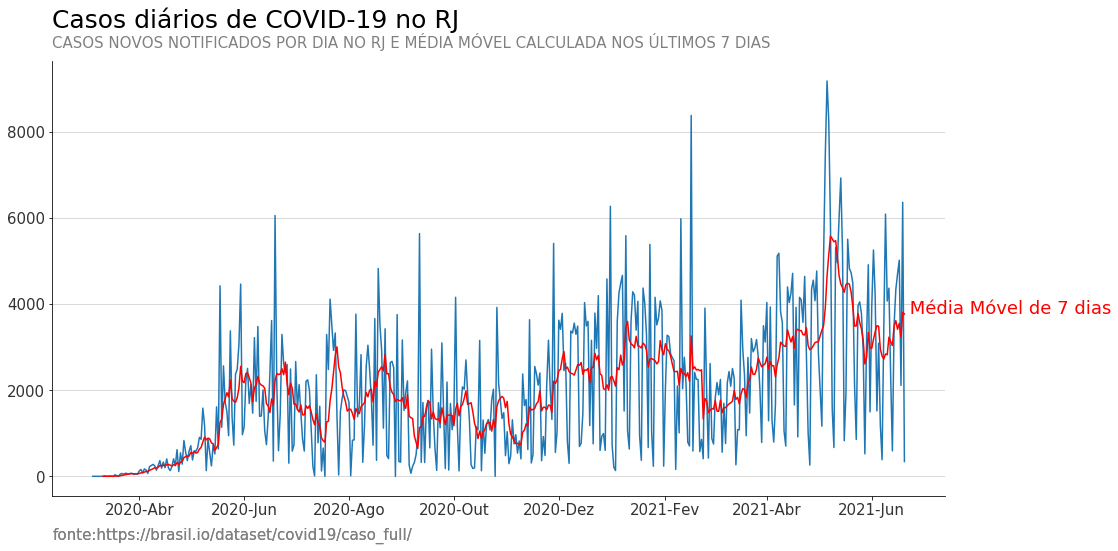

In [13]:
ax_casos=plot_time_series(dados_rj[['casos_novos', 'date']])
plot_time_series(dados_rj[['MM7_casos', 'date']],'Casos diários de COVID-19 no RJ', 
                 'CASOS NOVOS NOTIFICADOS POR DIA NO RJ E MÉDIA MÓVEL CALCULADA NOS ÚLTIMOS 7 DIAS', color='red', ax=ax_casos)
plt.annotate(' Média Móvel de 7 dias', (dados_rj['date'].iloc[-1],dados_rj['MM7_casos'].iloc[-1]), color='red')
plt.show()

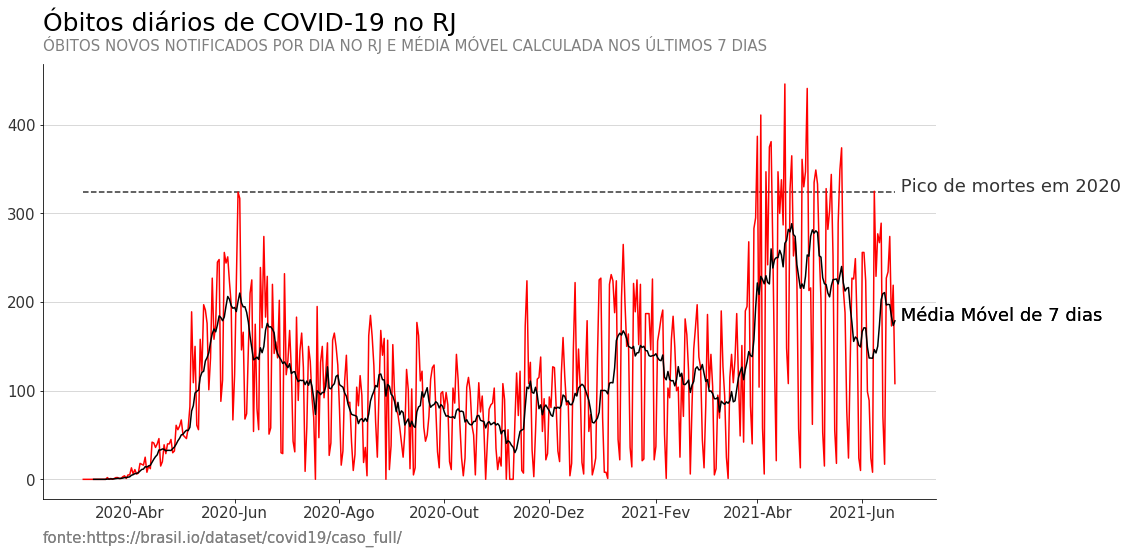

In [14]:
ax_obitos=plot_time_series(dados_rj[['obitos_novos', 'date']], color='red')
plot_time_series(dados_rj[['MM7_obitos', 'date']],'Óbitos diários de COVID-19 no RJ', 
                 'ÓBITOS NOVOS NOTIFICADOS POR DIA NO RJ E MÉDIA MÓVEL CALCULADA NOS ÚLTIMOS 7 DIAS', color='black', ax=ax_obitos)
plt.hlines(max(dados_rj[dados_rj['date'].dt.year == 2020]['obitos_novos']), min(dados_rj['date']), max(dados_rj['date']), linestyle='--', alpha=0.8)
plt.annotate(' Pico de mortes em 2020', (dados_rj['date'].iloc[-1],max(dados_rj[dados_rj['date'].dt.year == 2020]['obitos_novos'])), color='black', alpha=0.8)
plt.annotate(' Média Móvel de 7 dias', (dados_rj['date'].iloc[-1],dados_rj['MM7_obitos'].iloc[-1]), color='black')
plt.annotate(' Média Móvel de 7 dias', (dados_rj['date'].iloc[-1],dados_rj['MM7_obitos'].iloc[-1]), color='black')
plt.show()

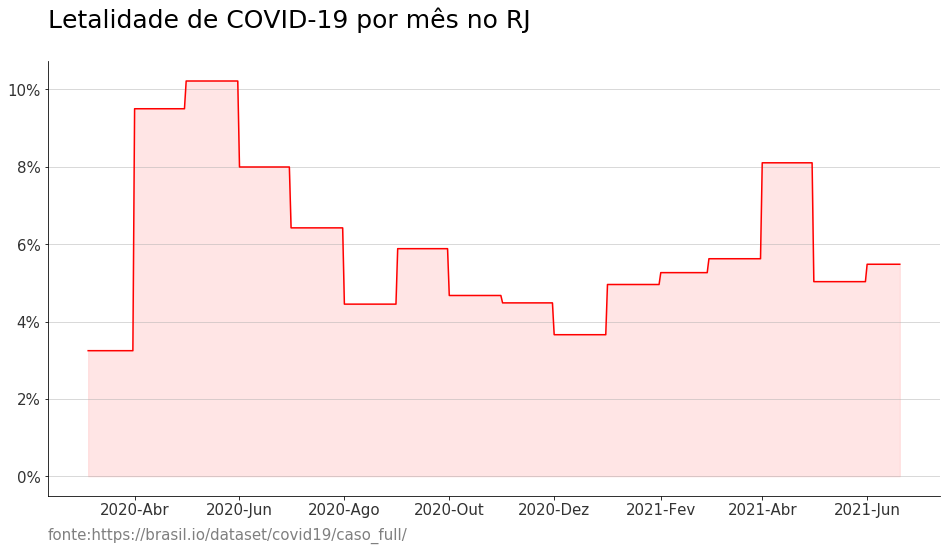

In [15]:
plot_time_series(dados_rj[['letalidade_mes', 'date']],'Letalidade de COVID-19 por mês no RJ', formatter_y=percent_formatter, color='red')
plt.fill_between(dados_rj['date'], dados_rj['letalidade_mes'], color='red', alpha=0.1)
plt.show()

# 6 - Modelos de previsões

## 6.1 - Tipo de modelo

## 6.2 - Métricas escolhidas

## 6.3 - Modelo para prever casos por dia de COVID-19 no Brasil

### 6.3.1 - Problema a ser resolvido

### 6.3.2 - Modelo mais simples

A fim de ter um ponto de partida como referência para realizar as melhoras do modelo será criado o modelo mais simples possível pelo Prophet a partir dos dados de casos novos por dia de COVID-19 no Brasil.

In [16]:
dados_casos = dados_br[['date', 'casos_novos']]
dados_casos.columns = ['ds', 'y']

In [17]:
modelo_casos_simples = Modelo_prophet_semanal(dados_casos)
modelo_casos_simples.treina()
modelo_casos_simples.c_valid(initial='180 days', period='7 days', horizon='7 days')
modelo_casos_simples.metricas()
modelo_casos_simples.metricas

  0%|          | 0/43 [00:00<?, ?it/s]

,horizon,rmse,mae
0,1 days,14329.135164,12084.027679
1,2 days,12200.694295,9874.922367
2,3 days,11335.022396,8849.926048
3,4 days,14780.961502,11193.598913
4,5 days,13099.501498,10441.229063
5,6 days,12379.770621,10004.152308
6,7 days,16242.398326,13547.253590


## 6.4 - Modelo para previsão de óbitos por COVID-19 no Brasil

### 6.4.1 - Problema a ser resolvido

### 6.4.2 - Modelo mais simples

A fim de ter um ponto de partida como referência para realizar as melhoras do modelo será criado o modelo mais simples possível pelo Prophet a partir dos dados de óbitos novos por dia de COVID-19 no Brasil.

In [18]:
dados_obitos = dados_br[['date', 'obitos_novos']]
dados_obitos.columns = ['ds', 'y']

In [19]:
modelo_obitos_simples = Modelo_prophet_semanal(dados_obitos)
modelo_obitos_simples.treina()
modelo_obitos_simples.c_valid(initial='180 days', period='7 days', horizon='7 days')
modelo_obitos_simples.metricas()
modelo_obitos_simples.metricas

  0%|          | 0/43 [00:00<?, ?it/s]

,horizon,rmse,mae
0,1 days,619.087759,408.094826
1,2 days,534.519279,375.548868
2,3 days,473.254874,337.493388
3,4 days,561.764382,422.437542
4,5 days,556.147482,378.499766
5,6 days,499.061311,356.128306
6,7 days,659.285093,424.657829


In [20]:
df_mm = dados_br[['date', 'MM7_casos']]

In [21]:
df_mm.columns = ['ds', 'y']

In [22]:
modelo_mm = Modelo_prophet_semanal(df_mm, changepoint_prior_scale=10.0, seasonality_mode='multiplicative', changepoint_range=0.9)

In [23]:
modelo_mm.treina()

In [24]:
modelo_mm.preve()

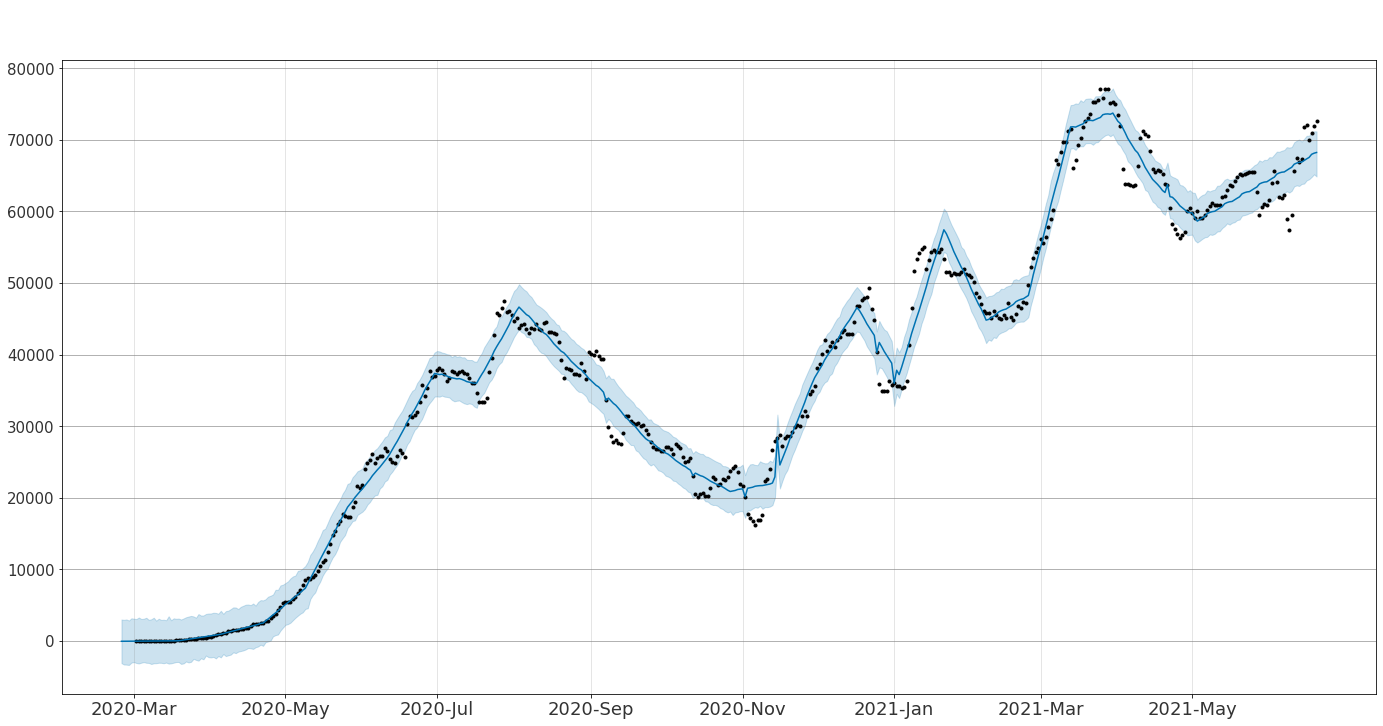

In [25]:
modelo_mm.plota()

In [26]:
df_casos = dados_br[['date', 'casos_novos']]

In [27]:
df_casos.columns = ['ds', 'y']

In [28]:
df_casos = df_casos.join(modelo_mm.previsao['yhat'])

In [29]:
df_casos = df_casos.rename(columns={'yhat':'mm_casos_prevista'})

In [30]:
modelo_casos = Modelo_prophet_semanal(df_casos, seasonality_mode='multiplicative')

In [31]:
modelo_casos.modelo.add_regressor('mm_casos_prevista', mode='additive')

In [32]:
modelo_casos.treina()

In [33]:
modelo_casos.preve()

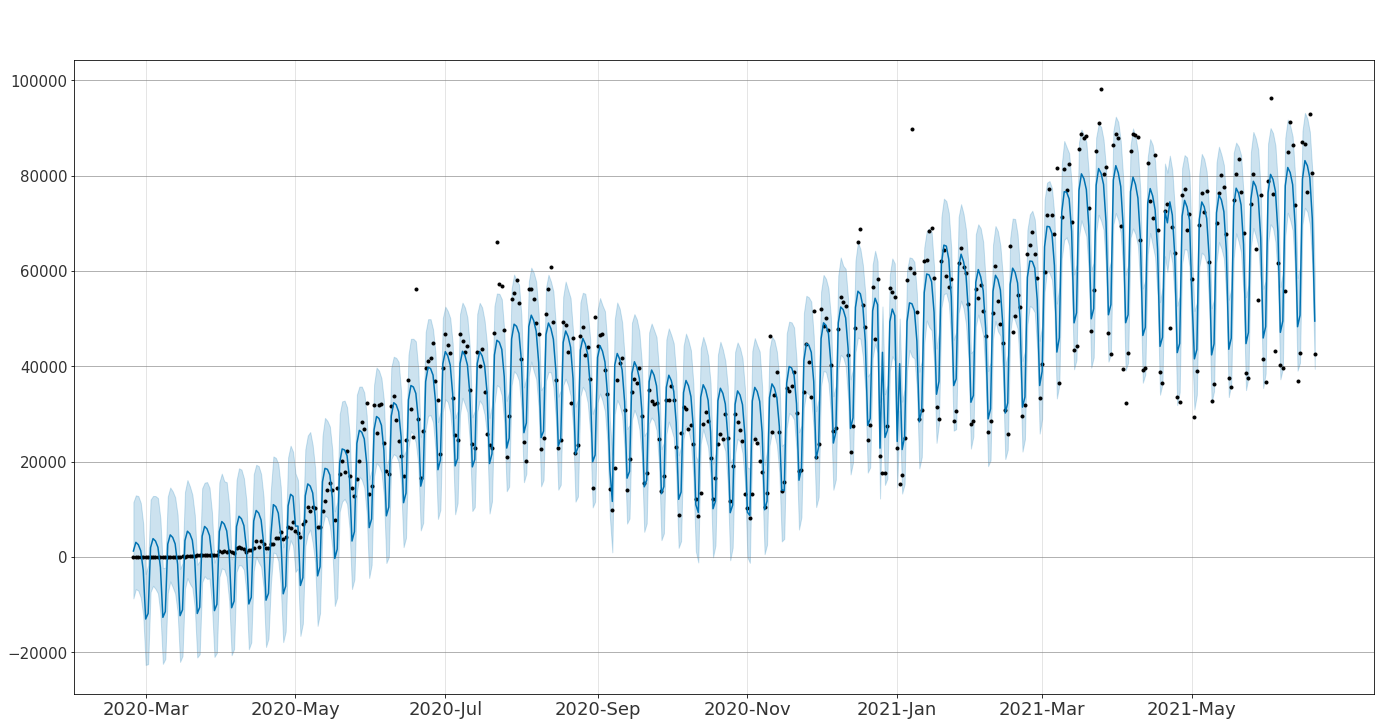

In [34]:
modelo_casos.plota()

In [35]:
modelo_casos.c_valid(initial='180 days', period='30 days', horizon='30 days')

  0%|          | 0/10 [00:00<?, ?it/s]

In [36]:
modelo_casos.metricas()

In [37]:
modelo_casos.metricas

,horizon,rmse,mae
0,3 days,9974.725150,7610.631513
1,4 days,9812.957677,7856.040296
2,5 days,10174.971014,8068.698560
3,6 days,9323.244087,6982.001139
4,7 days,9959.634492,7143.709192
5,8 days,9700.198223,7045.365032
6,9 days,8825.054475,6426.280016
7,10 days,7692.641350,6152.663283
8,11 days,9797.161757,7911.258009
9,12 days,11708.360187,9615.796449


In [38]:
modelo_casos.metricas

,horizon,rmse,mae
0,3 days,9974.725150,7610.631513
1,4 days,9812.957677,7856.040296
2,5 days,10174.971014,8068.698560
3,6 days,9323.244087,6982.001139
4,7 days,9959.634492,7143.709192
5,8 days,9700.198223,7045.365032
6,9 days,8825.054475,6426.280016
7,10 days,7692.641350,6152.663283
8,11 days,9797.161757,7911.258009
9,12 days,11708.360187,9615.796449


In [39]:
modelo_casos_simples = Modelo_prophet_semanal(df_casos)

In [40]:
modelo_casos_simples.treina()
modelo_casos_simples.preve()

In [41]:
modelo_casos_simples.c_valid(initial='180 days', period='30 days', horizon='30 days')

  0%|          | 0/10 [00:00<?, ?it/s]

In [42]:
modelo_casos_simples.metricas()

In [43]:
modelo_casos_simples.metricas

,horizon,rmse,mae
0,3 days,13412.220610,10990.509253
1,4 days,13723.039162,12027.803867
2,5 days,13870.043513,11808.571136
3,6 days,13663.126222,10740.448109
4,7 days,13120.742200,9827.777536
5,8 days,12239.096452,9294.313198
6,9 days,11595.280348,9219.392357
7,10 days,12640.751136,10208.823766
8,11 days,15310.851087,12518.940419
9,12 days,16373.756481,13628.580827


In [44]:
df = dados_br[['date', 'obitos_novos', 'casos_novos']]

In [45]:
df = df.rename(columns={'date':'ds', 'obitos_novos':'y'})

In [46]:
modelo = Modelo_prophet_semanal(df)

In [47]:
modelo.treina()

In [48]:
modelo.preve()

In [ ]:
modelo.c_valid(initial='180 days', period='7 days', horizon='7 days')

  0%|          | 0/43 [00:00<?, ?it/s]

In [ ]:
modelo.metricas()

In [ ]:
modelo.metricas

In [ ]:
df['casos_7dias_antes'] = df['casos_novos'].shift(7)

In [ ]:
modelo = Modelo_prophet_semanal(df.dropna())

In [ ]:
modelo.modelo.add_regressor('casos_7dias_antes')

In [ ]:
modelo.treina()

In [ ]:
modelo.preve()

In [ ]:
modelo.c_valid(initial='180 days', period='7 days', horizon='7 days')

In [ ]:
modelo.metricas()

In [ ]:
modelo.metricas